In [27]:
# coral_loader
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

from pyha_analyzer import extractors
import IPython

import seaborn as sns

In [3]:
coralreef_extractor = extractors.MultiCoralReef()
coral_ads = coralreef_extractor('/home/a.jajodia.229/acoustic/local_data/coral')

Site_A
Site_B
Site_C
A_ND
A_D
Australia
French_Polynesia
Indonesia
count: 44558


Casting to class labels:   0%|          | 0/44558 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/31190 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/4010 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/9358 [00:00<?, ? examples/s]

In [4]:
coral_ads

DatasetDict({
    train: Dataset({
        features: ['sample_rate', 'labels', 'filepath', 'audio', 'audio_in', 'site', 'dataset'],
        num_rows: 31190
    })
    valid: Dataset({
        features: ['sample_rate', 'labels', 'filepath', 'audio', 'audio_in', 'site', 'dataset'],
        num_rows: 4010
    })
    test: Dataset({
        features: ['sample_rate', 'labels', 'filepath', 'audio', 'audio_in', 'site', 'dataset'],
        num_rows: 9358
    })
})

In [5]:
data = coral_ads['test'].to_pandas()

data = data[data['dataset'] == 'Paola']

In [6]:
FILENAME = data['filepath'][0]

model = hub.load('https://kaggle.com/models/google/humpback-whale/frameworks/TensorFlow2/variations/humpback-whale/versions/1')

whale_presence = []

for FILENAME in data['filepath']:
    
    
    waveform, sample_rate = tf.audio.decode_wav(tf.io.read_file(FILENAME))

    waveform = tf.expand_dims(waveform, 0)  # makes a batch of size 1
    context_step_samples = tf.cast(sample_rate, tf.int64)
    score_fn = model.signatures['score']
    
    
    try:
        scores = score_fn(waveform=waveform, context_step_samples=context_step_samples)
    except TypeError:
        print('ERROR: ', FILENAME)
        continue
    
    if float(tf.reduce_max(scores['scores']).numpy()) > 0.5:
        print("Whale found:", FILENAME)
    
    whale_presence.append(float(tf.reduce_max(scores['scores']).numpy()))

I0000 00:00:1752601566.672635  129024 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 46762 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:02:00.0, compute capability: 8.6
I0000 00:00:1752601573.837433  129329 cuda_dnn.cc:529] Loaded cuDNN version 90501


Whale found: /home/a.jajodia.229/acoustic/local_data/coral/Paola/A_ND/Februrary_March2024/20240227_064500.WAV
Whale found: /home/a.jajodia.229/acoustic/local_data/coral/Paola/A_D/May 2025/20250316_080700.WAV
Whale found: /home/a.jajodia.229/acoustic/local_data/coral/Paola/A_ND/June2025/20250627_182421.WAV
Whale found: /home/a.jajodia.229/acoustic/local_data/coral/Paola/A_ND/April2024/20240309_051600.WAV
Whale found: /home/a.jajodia.229/acoustic/local_data/coral/Paola/A_ND/Februrary_March2024/20240229_134000.WAV
Whale found: /home/a.jajodia.229/acoustic/local_data/coral/Paola/A_ND/Februrary_March2024/20240229_212200.WAV
Whale found: /home/a.jajodia.229/acoustic/local_data/coral/Paola/A_ND/Februrary_March2024/20240228_025200.WAV
Whale found: /home/a.jajodia.229/acoustic/local_data/coral/Paola/A_ND/Februrary_March2024/20240229_070500.WAV
Whale found: /home/a.jajodia.229/acoustic/local_data/coral/Paola/A_ND/April2024/20240309_012800.WAV
Whale found: /home/a.jajodia.229/acoustic/local_data/

In [11]:
len([i for i in whale_presence if i > 0.7])/len(whale_presence)

0.01735547509052316

<Axes: ylabel='Count'>

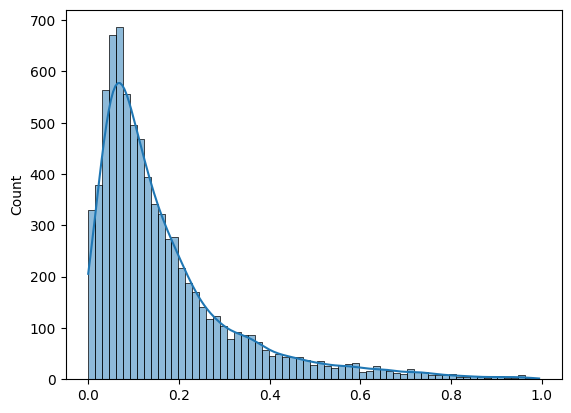

In [31]:
sns.histplot(np.nan_to_num(np.array(whale_presence), neginf = 0), kde = True)

In [20]:
np.sort(whale_presence)

array([      -inf,       -inf,       -inf, ..., 0.97758693, 0.97935092,
       0.99396074])

In [32]:
sorted = np.array(data['filepath'])[np.argsort(whale_presence)]

In [33]:
display(IPython.display.Audio(sorted[-1], autoplay=True))